<a href="https://colab.research.google.com/github/gurram46/Fraud-Detection-with-Neural-Network/blob/main/Fraud_Detection_with_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
train_transaction = pd.read_csv('/content/train_transaction.csv')
train_identity = pd.read_csv('/content/train_identity.csv')
test_transaction = pd.read_csv('/content/test_transaction.csv')
test_identity = pd.read_csv('/content/test_identity.csv')

In [ ]:
print(train_transaction.head())
print(train_identity.head())

   TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  card1  \
0        2987000        0          86400            68.5         W  13926   
1        2987001        0          86401            29.0         W   2755   
2        2987002        0          86469            59.0         W   4663   
3        2987003        0          86499            50.0         W  18132   
4        2987004        0          86506            50.0         H   4497   

   card2  card3       card4  card5  ... V330  V331  V332  V333  V334 V335  \
0    NaN  150.0    discover  142.0  ...  NaN   NaN   NaN   NaN   NaN  NaN   
1  404.0  150.0  mastercard  102.0  ...  NaN   NaN   NaN   NaN   NaN  NaN   
2  490.0  150.0        visa  166.0  ...  NaN   NaN   NaN   NaN   NaN  NaN   
3  567.0  150.0  mastercard  117.0  ...  NaN   NaN   NaN   NaN   NaN  NaN   
4  514.0  150.0  mastercard  102.0  ...  0.0   0.0   0.0   0.0   0.0  0.0   

  V336  V337  V338  V339  
0  NaN   NaN   NaN   NaN  
1  NaN   NaN   NaN  

In [ ]:
print(train_transaction.columns)
print(train_identity.columns)

Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5',
       ...
       'V330', 'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338',
       'V339'],
      dtype='object', length=394)
Index(['TransactionID', 'id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06',
       'id_07', 'id_08', 'id_09', 'id_10', 'id_11', 'id_12', 'id_13', 'id_14',
       'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22',
       'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 'id_29', 'id_30',
       'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38',
       'DeviceType', 'DeviceInfo'],
      dtype='object')


In [ ]:
column_names_transaction = [
    'TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt', 'ProductCD',
    'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 'addr1', 'addr2',
    'dist1', 'dist2', 'P_emaildomain', 'R_emaildomain', 'C1', 'C2', 'C3', 'C4',
    'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1',
    'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13',
    'D14', 'D15', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9'
]

In [ ]:
train_transaction = pd.read_csv('/content/train_transaction.csv', names=column_names_transaction, header=0)

In [ ]:
train_data = pd.merge(train_transaction, train_identity, on='TransactionID', how='left')
test_data = pd.merge(test_transaction, test_identity, on='TransactionID', how='left')

In [ ]:
train_data.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10.0,0.0,4.0,0.0,0.0,1.0,1.0,1.0,1.0,38.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128195 entries, 0 to 128194
Data columns (total 95 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   TransactionID   128183 non-null  float64
 1   isFraud         128183 non-null  float64
 2   TransactionDT   128183 non-null  float64
 3   TransactionAmt  128194 non-null  float64
 4   ProductCD       128194 non-null  float64
 5   card1           128183 non-null  float64
 6   card2           128183 non-null  float64
 7   card3           128183 non-null  float64
 8   card4           128183 non-null  float64
 9   card5           128183 non-null  float64
 10  card6           128183 non-null  float64
 11  addr1           128194 non-null  float64
 12  addr2           128183 non-null  float64
 13  dist1           128183 non-null  float64
 14  dist2           128183 non-null  float64
 15  P_emaildomain   128194 non-null  float64
 16  R_emaildomain   128194 non-null  float64
 17  C1        

In [ ]:
train_data.describe()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_17,id_18,id_19,id_20,id_21,id_22,id_24,id_25,id_26,id_32
count,128183.000000,128183.000000,128183.000000,128194.000000,128194.000000,128183.000000,128183.000000,128183.000000,128183.000000,128183.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,0.805762,0.031751,0.250415,0.141075,0.178058,1.089614,1.554738,1.207009,0.163969,0.826607,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,2.127785,0.190111,0.743704,0.377431,0.508089,0.796242,15.510588,4.050380,1.018114,15.805633,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,59.000000,4.000000,20.000000,5.000000,8.000000,66.000000,972.000000,323.000000,65.000000,991.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
train_data.isnull().sum()

,0
TransactionID,12
isFraud,12
TransactionDT,12
TransactionAmt,1
ProductCD,1
...,...
id_36,128195
id_37,128195
id_38,128195
DeviceType,128195


# Feature Engineering & Encode Categorical Variables:

In [ ]:
train_data=train_data.fillna(train_data.median())

In [ ]:
train_data=pd.get_dummies(train_data,drop_first=True)

In [ ]:
train_data['TransactionAmt']=np.log1p(train_data['TransactionAmt'])

#Visulation

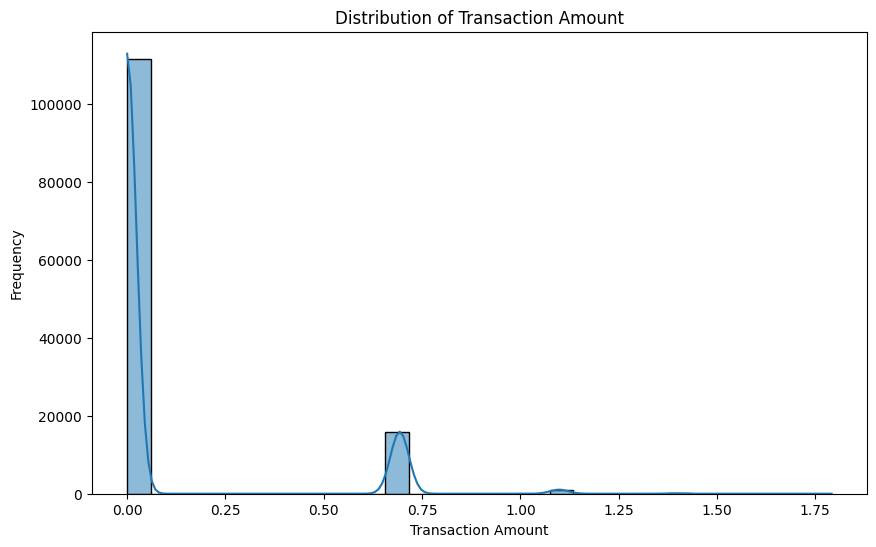

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(train_data['TransactionAmt'], bins=30, kde=True)
plt.title("Distribution of Transaction Amount")
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.show()

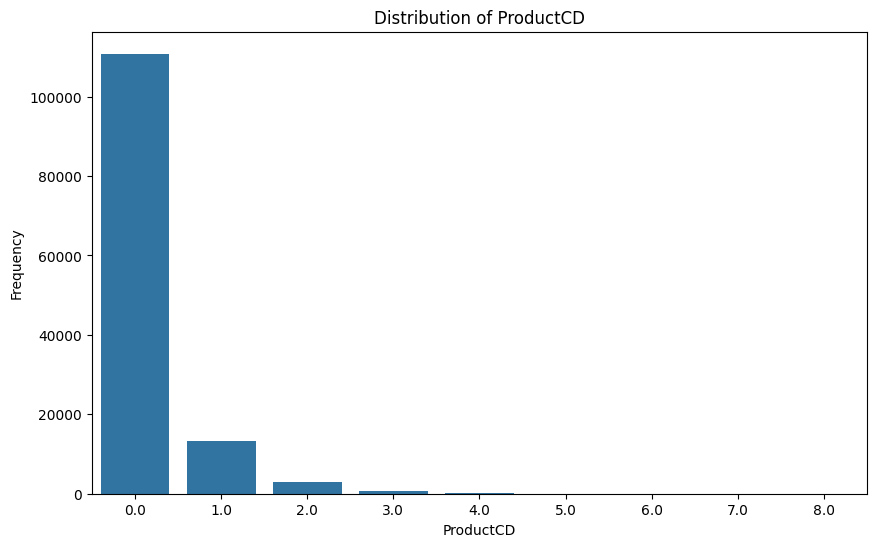

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=train_data,x='ProductCD')
plt.title("Distribution of ProductCD")
plt.xlabel("ProductCD")
plt.ylabel("Frequency")
plt.show()

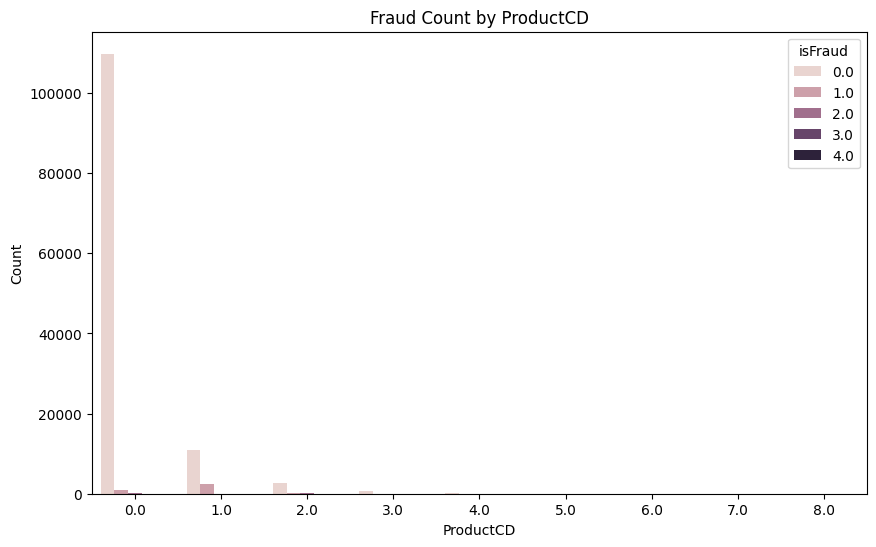

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=train_data,x='ProductCD',hue='isFraud')
plt.title('Fraud Count by ProductCD')
plt.xlabel('ProductCD')
plt.ylabel('Count')
plt.legend(title='isFraud')
plt.show()

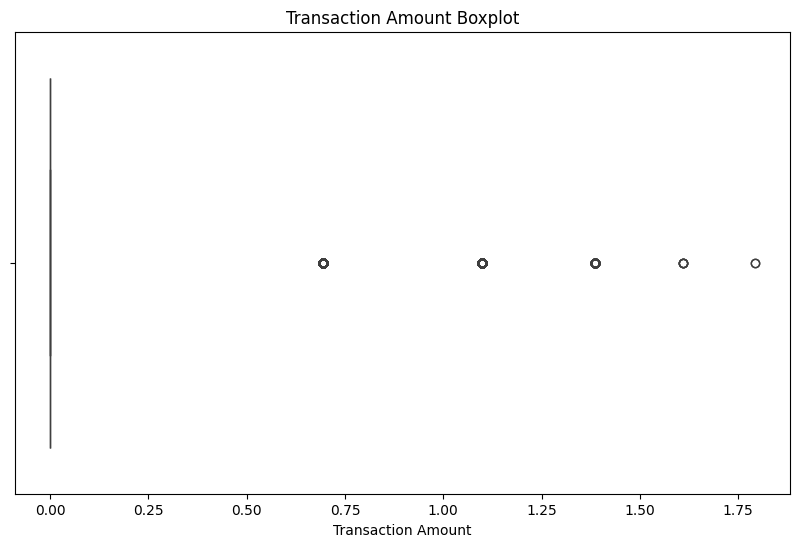

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x=train_data['TransactionAmt'])
plt.title('Transaction Amount Boxplot')
plt.xlabel('Transaction Amount')
plt.show()

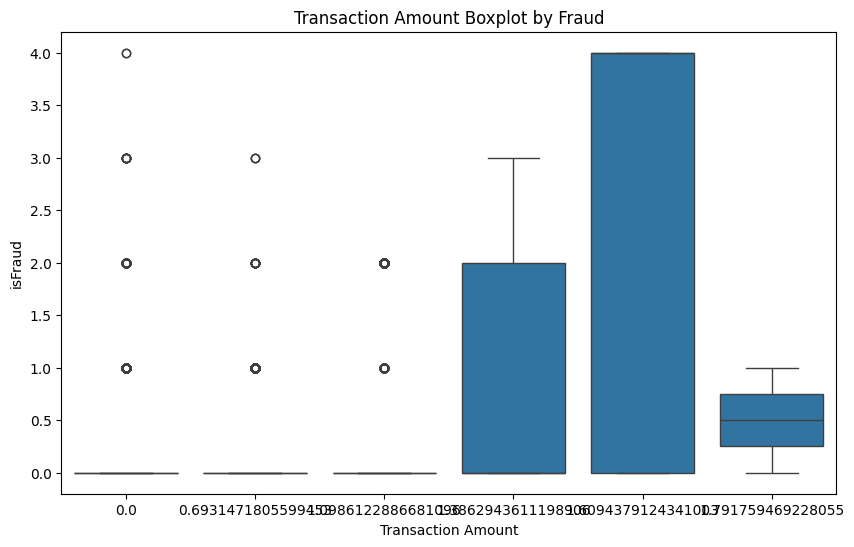

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x=train_data['TransactionAmt'],y=train_data['isFraud'])
plt.title('Transaction Amount Boxplot by Fraud')
plt.xlabel('Transaction Amount')
plt.ylabel('isFraud')
plt.show()

In [ ]:
Q1 = train_data['TransactionAmt'].quantile(0.25)
Q3 = train_data['TransactionAmt'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
train_data['TransactionAmt'] = np.where(train_data['TransactionAmt'] < lower_bound, lower_bound, train_data['TransactionAmt'])
train_data['TransactionAmt'] = np.where(train_data['TransactionAmt'] > upper_bound, upper_bound, train_data['TransactionAmt'])


# Impute Missing Values & Scale the Features

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
train_data_imputed = imputer.fit_transform(train_data.drop(columns=['TransactionID', 'isFraud']))

# Check for NaN values after imputation
print(f'NaN values after imputation: {np.isnan(train_data_imputed).sum()}')  # Should be 0


NaN values after imputation: 0


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(train_data_imputed)

X = X_scaled
y = train_data['isFraud']


# Model's:

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Check for NaN values in training and validation sets
print(f'NaN values in X_train: {np.isnan(X_train).sum()}')
print(f'NaN values in X_val: {np.isnan(X_val).sum()}')
print(f'NaN values in y_train: {np.isnan(y_train).sum()}')
print(f'NaN values in y_val: {np.isnan(y_val).sum()}')


NaN values in X_train: 0
NaN values in X_val: 0
NaN values in y_train: 0
NaN values in y_val: 0


# Neural Network:

In [ ]:
model=Sequential([
    Dense(64, activation='relu',input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['AUC'])

In [ ]:
print(f'Data types in X_train: {X_train.dtype}')
print(f'Data types in X_val: {X_val.dtype}')

Data types in X_train: float64
Data types in X_val: float64


In [ ]:
history=model.fit(X_train,y_train,epochs=10,batch_size=32,validation_data=(X_val,y_val))

Epoch 1/10
3205/3205 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - AUC: 0.9349 - loss: 0.0761 - val_AUC: 0.9933 - val_loss: -0.1147
Epoch 2/10
3205/3205 ━━━━━━━━━━━━━━━━━━━━ 22s 4ms/step - AUC: 0.9866 - loss: -0.2496 - val_AUC: 0.9848 - val_loss: -0.9341
Epoch 3/10
3205/3205 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - AUC: 0.9796 - loss: -1.1368 - val_AUC: 0.9881 - val_loss: -2.9857
Epoch 4/10
3205/3205 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - AUC: 0.9804 - loss: -4.1058 - val_AUC: 0.9755 - val_loss: -6.6365
Epoch 5/10
3205/3205 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - AUC: 0.9833 - loss: -7.5437 - val_AUC: 0.9854 - val_loss: -12.6678
Epoch 6/10
3205/3205 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - AUC: 0.9776 - loss: -12.1679 - val_AUC: 0.9841 - val_loss: -20.9870
Epoch 7/10
3205/3205 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - AUC: 0.9802 - loss: -20.0115 - val_AUC: 0.9853 - val_loss: -33.7137
Epoch 8/10
3205/3205 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - AUC: 0.9808 - loss: -27.1220 - val_AUC: 0.9867 - val_loss: -48.9138
Epoch 9/10


# Evaluate the Model:

In [ ]:
y_pred_nn = model.predict(X_val).ravel()

802/802 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [ ]:
y_val_binary = (y_val > 0).astype(int)

In [ ]:
auc_roc_nn=roc_auc_score(y_val_binary,y_pred_nn)
print(f'Neural Network AUC-ROC: {auc_roc_nn}')

Neural Network AUC-ROC: 0.9893522543849071


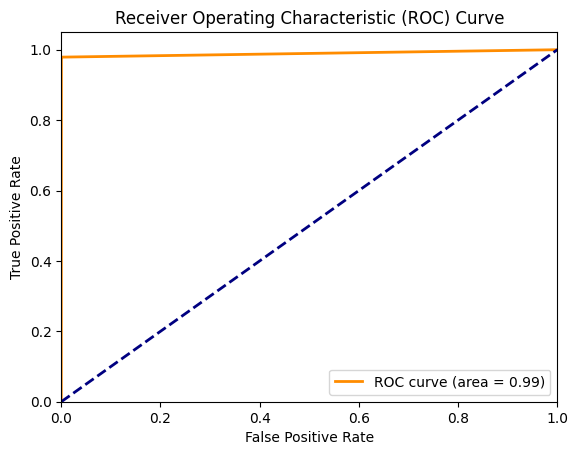

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_val_binary, y_pred_nn)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {auc_roc_nn:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
test_data=pd.get_dummies(test_data,drop_first=True)

In [ ]:
test_data=test_data.reindex(columns=train_data.columns,fill_value=0)

In [ ]:
Q1 = train_data['TransactionAmt'].quantile(0.25)
Q3 = train_data['TransactionAmt'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [ ]:
test_data['TransactionAmt'] = np.where(test_data['TransactionAmt'] < lower_bound, lower_bound, test_data['TransactionAmt'])
test_data['TransactionAmt'] = np.where(test_data['TransactionAmt'] > upper_bound, upper_bound, test_data['TransactionAmt'])

In [ ]:
test_data_imputed = imputer.transform(test_data.drop(columns=['TransactionID', 'isFraud']))

In [ ]:
test_data_scaled=scaler.transform(test_data_imputed)

In [ ]:
y_test_pred=model.predict(test_data_scaled).ravel()

5662/5662 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step


In [ ]:
y_test_predict=(y_test_pred>0.5).astype(int)

In [ ]:
output=pd.DataFrame({
    'TransactionID':test_data['TransactionID'],
    'isFraud':y_test_predict
})


In [ ]:
output.head()

,TransactionID,isFraud
0,3663549,1
1,3663550,1
2,3663551,1
3,3663552,1
4,3663553,1


In [ ]:
output.to_csv('predictions.csv', index=False)